In [14]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# combine schedule csvs
csv_files = sorted([f for f in os.listdir('../schedules') if f.endswith('.csv')])

sched_list = []
for file in csv_files: 
    sched_df = pd.read_csv('../schedules/' + file)
    sched_df['Year'] = '20' + file.split('.')[0][-2:]
    sched_df['Semester'] = file.split('.')[0][:-2]
    sched_list.append(sched_df)

df = pd.concat([f for f in sched_list], ignore_index=True)

In [4]:
# save df
df.to_csv('../data/combined_schedules.csv', index=False)

In [5]:
NUM_LIST = ['Cap', 'Act', 'Rem', 'WL Cap','WL Act','WL Rem','XL Cap','XL Act','XL Rem']
CORE_LIST = ['128', '200', '220', '274', '306', '341', '358', '370', '400', '403', '406', '442']

In [6]:
# remove 102 entries
df = df[df['Title'] != 'INTRODUCTION TO COMPUTER SCIENCE - LAB']

# change CrseNum to string
df['CrseNum'] = df['CrseNum'].astype(str)

# replace equivalent classes
df['CrseNum'] = df['CrseNum'].replace('101', '128')
df['CrseNum'] = df['CrseNum'].replace('261', '200')
df['CrseNum'] = df['CrseNum'].replace('262', '220')

# replace equivalent course names
df['Title'] = df['Title'].replace('INTRODUCTION TO COMPUTER SCIENCE', 'COMPUTER SCIENCE FOR STEM')
df['Title'] = df['Title'].replace('PROGRAMMING CONCEPTS', 'FOUNDATIONAL PROGRAMMING CONCEPTS & DESIGN')
df['Title'] = df['Title'].replace('DATA STRUCTURES', 'DATA STRUCTURES AND ALGORITHMS')

# filter to only CrseNum in CORE_LIST
df = df[df['CrseNum'].isin(CORE_LIST)]

# set all columns in NUM_LIST to int
for col in NUM_LIST:
    df.loc[:,col] = df[col].astype(int)

# group by class and year
core_df = df.groupby(['CrseNum','Title', 'Year', 'Semester']).sum().reset_index()

# drop unncessary columns
core_df = core_df[NUM_LIST + ['CrseNum', 'Title', 'Year', 'Semester']]

core_df['Class'] = 'CSCI' + core_df['CrseNum']
core_df['Year_Semester'] = core_df['Semester'] + ' ' + core_df['Year']

display(core_df[core_df['CrseNum'] == '128'])

,Cap,Act,Rem,WL Cap,WL Act,WL Rem,XL Cap,XL Act,XL Rem,CrseNum,Title,Year,Semester,Class,Year_Semester
0,486,474,12,0,0,0,0,0,0,128,COMPUTER SCIENCE FOR STEM,2021,Fall,CSCI128,Fall 2021
1,581,559,22,0,0,0,0,0,0,128,COMPUTER SCIENCE FOR STEM,2022,Fall,CSCI128,Fall 2022
2,570,552,18,0,0,0,0,0,0,128,COMPUTER SCIENCE FOR STEM,2022,Spring,CSCI128,Spring 2022
3,865,815,50,35,0,35,0,0,0,128,COMPUTER SCIENCE FOR STEM,2023,Fall,CSCI128,Fall 2023
4,594,574,20,0,0,0,0,0,0,128,COMPUTER SCIENCE FOR STEM,2023,Spring,CSCI128,Spring 2023
5,670,0,670,250,0,250,0,0,0,128,COMPUTER SCIENCE FOR STEM,2024,Fall,CSCI128,Fall 2024
6,610,572,38,0,0,0,0,0,0,128,COMPUTER SCIENCE FOR STEM,2024,Spring,CSCI128,Spring 2024


In [7]:
# load eligible and taken
eligible_df = pd.read_csv('../data/eligible.csv')
taken_df = pd.read_csv('../data/taken.csv')

# filter only classes in core
eligible_df = eligible_df[eligible_df['Class'].isin(core_df['Class'])]
taken_df = taken_df[taken_df['Class'].isin(core_df['Class'])]

# filter only year semester in schedules
eligible_df = eligible_df[eligible_df['Year_Semester'].isin(core_df['Year_Semester'])]
taken_df = taken_df[taken_df['Year_Semester'].isin(core_df['Year_Semester'])]

# merge eligible and taken on Year_Semster,Class
combined_df = eligible_df.merge(taken_df, on=['Year_Semester', 'Class'], how='left')

display(combined_df)

# save combined_df
combined_df.to_csv('../data/combined.csv', index=False)

,Year_Semester,Eligible,Class,Taken
0,Spring 2022,2082,CSCI128,482
1,Fall 2021,2473,CSCI128,408
2,Fall 2022,2551,CSCI128,511
3,Spring 2023,2058,CSCI128,528
4,Fall 2023,2138,CSCI128,755
5,Spring 2024,1391,CSCI128,0
6,Fall 2022,1091,CSCI200,206
7,Fall 2023,1801,CSCI200,302
8,Spring 2023,1318,CSCI200,241
9,Spring 2024,2277,CSCI200,0


In [8]:
# merge core and combined
final_df = core_df.merge(combined_df, on=['Year_Semester', 'Class'], how='left')

display(final_df[final_df['CrseNum'] == '128'])

,Cap,Act,Rem,WL Cap,WL Act,WL Rem,XL Cap,XL Act,XL Rem,CrseNum,Title,Year,Semester,Class,Year_Semester,Eligible,Taken
0,486,474,12,0,0,0,0,0,0,128,COMPUTER SCIENCE FOR STEM,2021,Fall,CSCI128,Fall 2021,2473.0,408.0
1,581,559,22,0,0,0,0,0,0,128,COMPUTER SCIENCE FOR STEM,2022,Fall,CSCI128,Fall 2022,2551.0,511.0
2,570,552,18,0,0,0,0,0,0,128,COMPUTER SCIENCE FOR STEM,2022,Spring,CSCI128,Spring 2022,2082.0,482.0
3,865,815,50,35,0,35,0,0,0,128,COMPUTER SCIENCE FOR STEM,2023,Fall,CSCI128,Fall 2023,2138.0,755.0
4,594,574,20,0,0,0,0,0,0,128,COMPUTER SCIENCE FOR STEM,2023,Spring,CSCI128,Spring 2023,2058.0,528.0
5,670,0,670,250,0,250,0,0,0,128,COMPUTER SCIENCE FOR STEM,2024,Fall,CSCI128,Fall 2024,NaN,NaN
6,610,572,38,0,0,0,0,0,0,128,COMPUTER SCIENCE FOR STEM,2024,Spring,CSCI128,Spring 2024,1391.0,0.0


In [9]:
# define order to sort Year_Semester by 
order = ['Fall 2021', 'Spring 2022', 'Fall 2022', 'Spring 2023', 'Fall 2023']

# sort by order
final_df['Year_Semester'] = pd.Categorical(final_df['Year_Semester'], categories=order, ordered=True)
final_df = final_df.sort_values('Year_Semester')
final_df['Passed'] = final_df['Taken']
final_df = final_df.drop(columns=['Taken']).dropna()
display(final_df)

,Cap,Act,Rem,WL Cap,WL Act,WL Rem,XL Cap,XL Act,XL Rem,CrseNum,Title,Year,Semester,Class,Year_Semester,Eligible,Passed
0,486,474,12,0,0,0,0,0,0,128,COMPUTER SCIENCE FOR STEM,2021,Fall,CSCI128,Fall 2021,2473.0,408.0
41,164,157,7,0,0,0,0,0,0,358,DISCRETE MATHEMATICS,2021,Fall,CSCI358,Fall 2021,2600.0,138.0
48,84,83,1,0,0,0,0,0,0,370,ADVANCED SOFTWARE ENGINEERING,2021,Fall,CSCI370,Fall 2021,344.0,78.0
34,199,183,16,0,0,0,0,0,0,341,COMPUTER ORGANIZATION,2021,Fall,CSCI341,Fall 2021,2115.0,157.0
27,180,158,22,0,0,0,0,0,0,306,SOFTWARE ENGINEERING,2021,Fall,CSCI306,Fall 2021,709.0,150.0
68,130,128,2,0,0,0,0,0,0,406,ALGORITHMS,2021,Fall,CSCI406,Fall 2021,410.0,114.0
21,275,250,25,0,0,0,0,0,0,274,INTRODUCTION TO THE LINUX OPERATING SYSTEM,2021,Fall,CSCI274,Fall 2021,2018.0,223.0
14,619,566,53,0,0,0,0,0,0,220,DATA STRUCTURES AND ALGORITHMS,2021,Fall,CSCI220,Fall 2021,1529.0,254.0
55,123,132,-9,0,0,0,0,0,0,400,PRINCIPLES OF PROGRAMMING LANGUAGES,2021,Fall,CSCI400,Fall 2021,248.0,123.0
75,141,125,16,0,0,0,0,0,0,442,OPERATING SYSTEMS,2021,Fall,CSCI442,Fall 2021,354.0,91.0


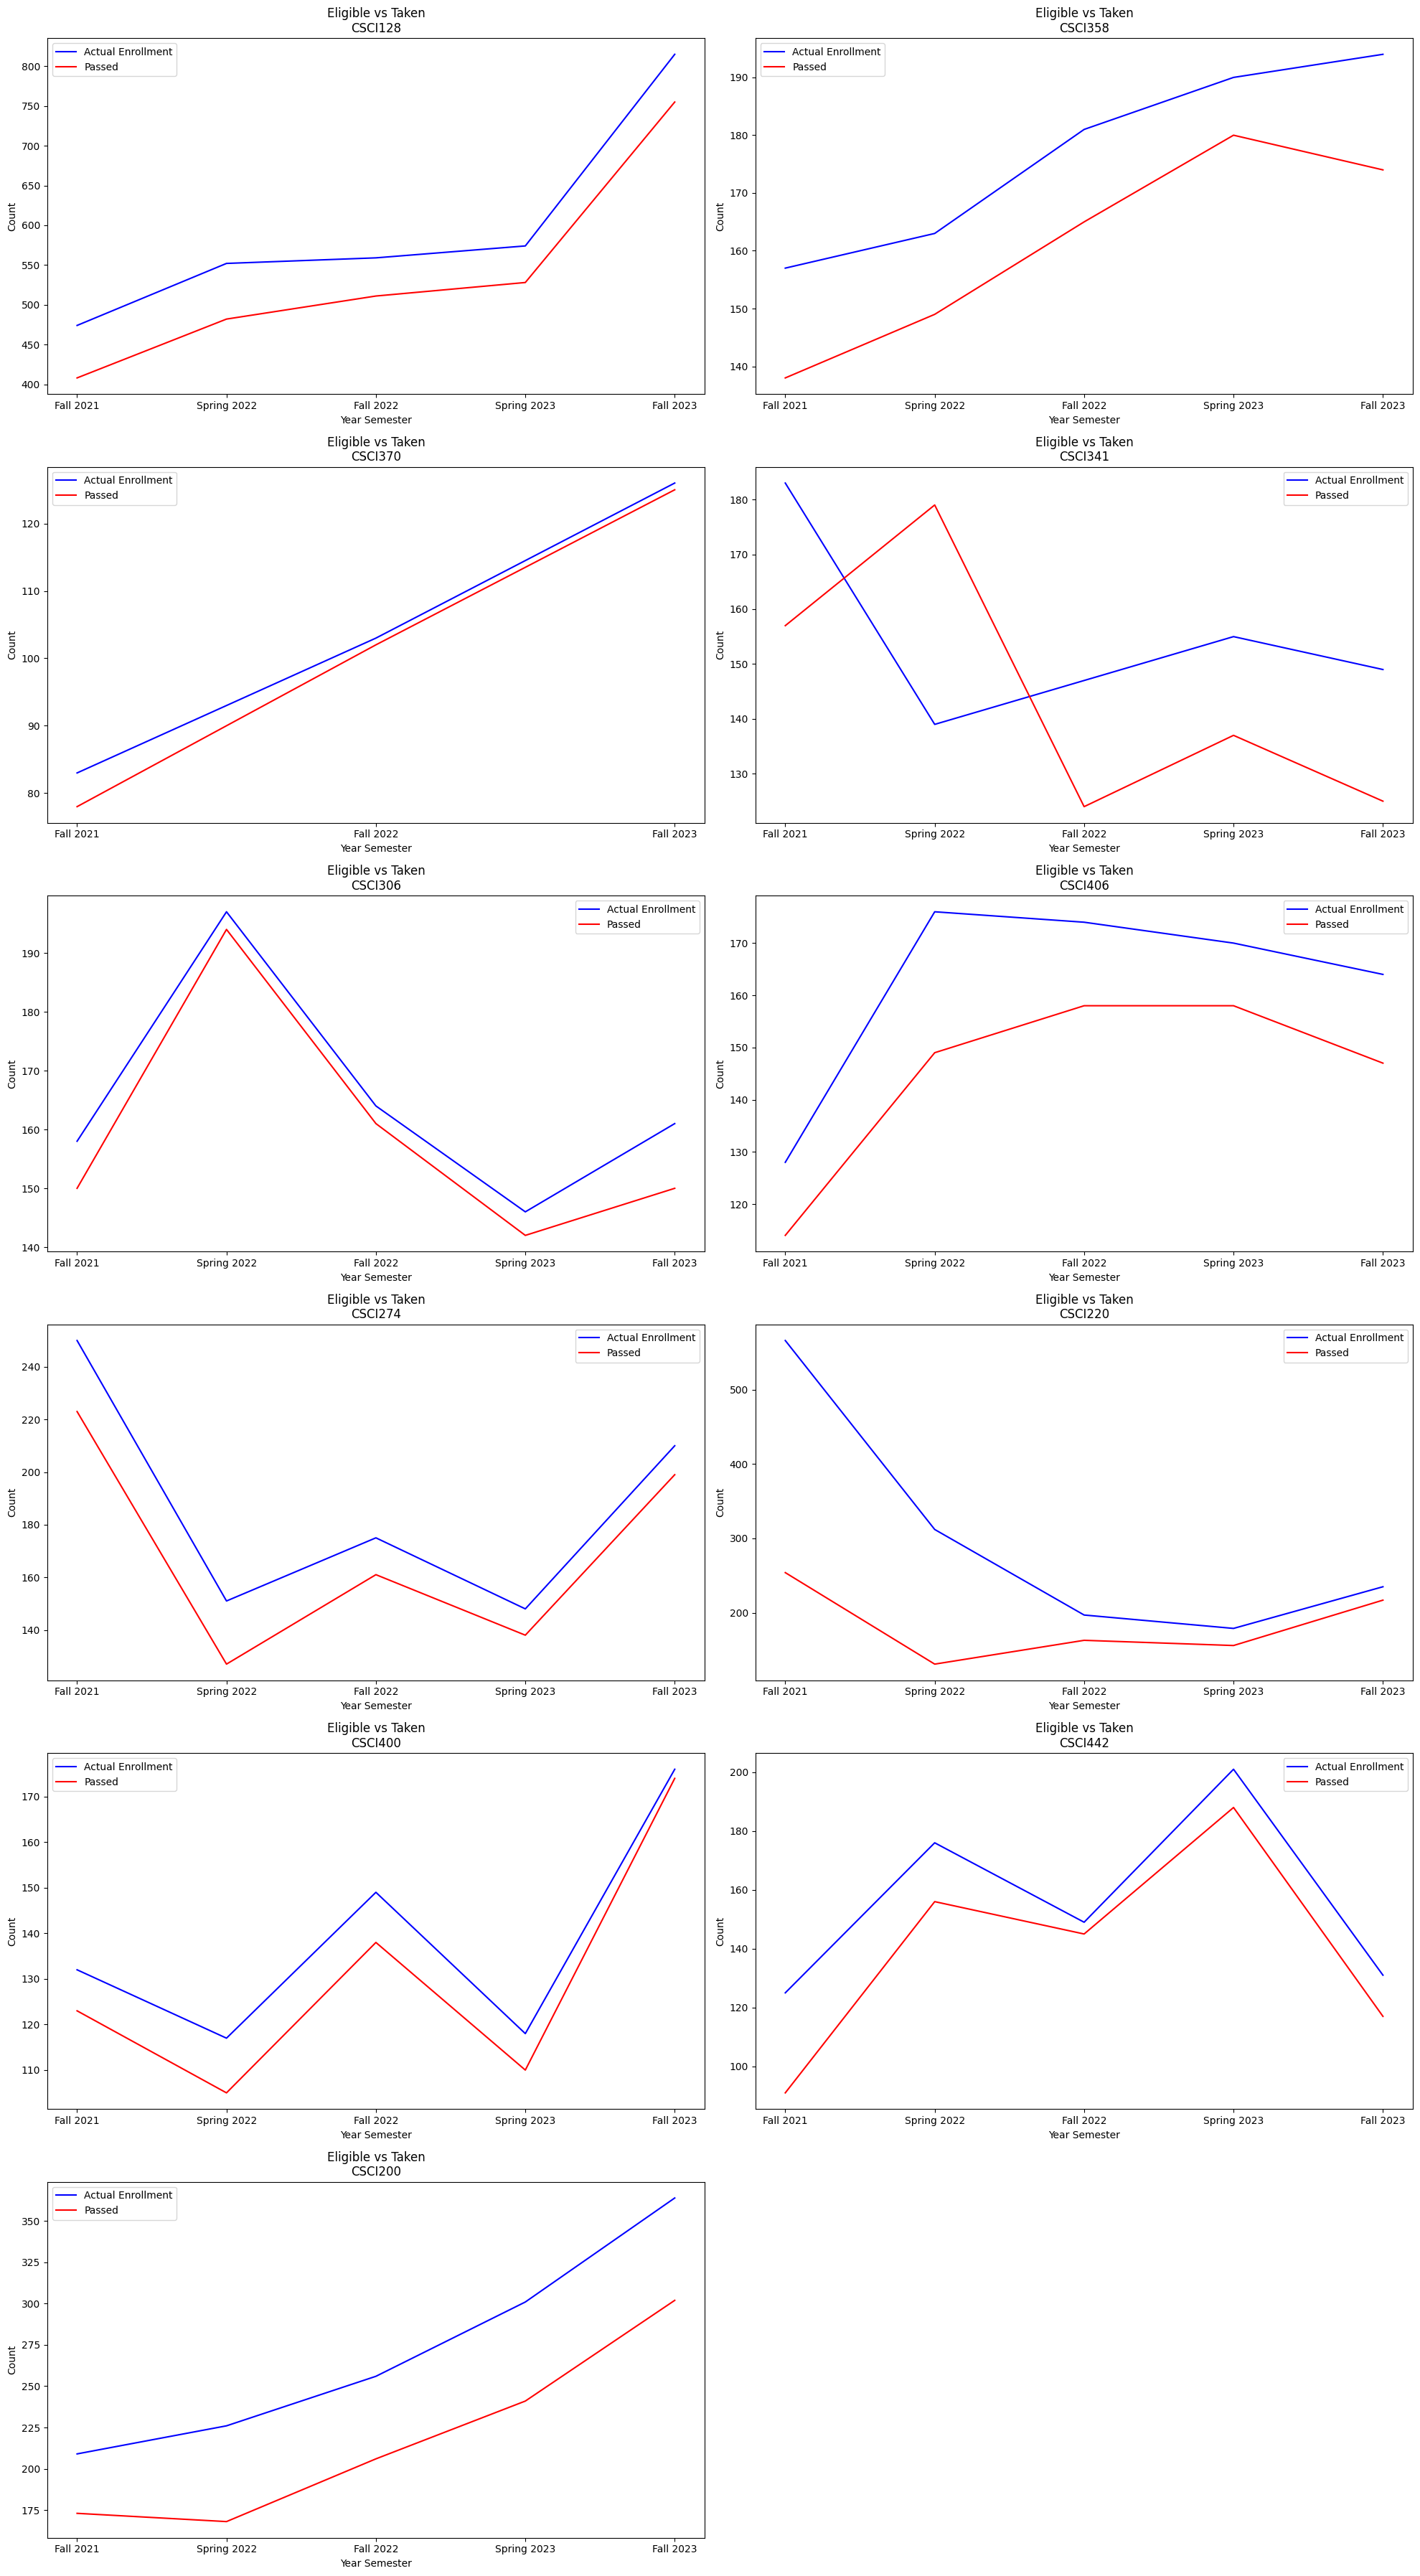

In [19]:
# Assuming final_df is already defined

def plot_actual_to_passed(df, class_name, ax):
    plot_df = df[df['Class'] == class_name]

    # cast Act and Passed as int to silence warning
    plot_df.loc[:, 'Act'] = plot_df['Act'].astype(int)
    plot_df.loc[:, 'Passed'] = plot_df['Passed'].astype(int)    

    ax.plot(plot_df['Year_Semester'], plot_df['Act'], color='b', label='Actual Enrollment')
    ax.plot(plot_df['Year_Semester'], plot_df['Passed'], color='r', label='Passed')
    ax.set_xlabel('Year Semester')
    ax.set_ylabel('Count')
    ax.set_title(f'Eligible vs Taken\n{class_name}')
    ax.legend()

# Calculate the number of rows and columns for the subplot grid
num_classes = len(final_df['Class'].unique())
num_rows = int(np.ceil(num_classes / 2))  # Adjust the divisor to change the number of columns

# Create a figure with subplots
fig, axs = plt.subplots(num_rows, 2, figsize=(20, 6 * num_rows))
axs = axs.flatten()  # Flatten the array for easy iteration

# Loop through each class and plot
for i, cl in enumerate(final_df['Class'].unique()):
    plot_actual_to_passed(final_df, cl, axs[i])

# Adjust layout
fig.tight_layout()

# Hide unused subplots if the number of classes is odd
if num_classes % 2 != 0:
    axs[-1].axis('off')

plt.show()

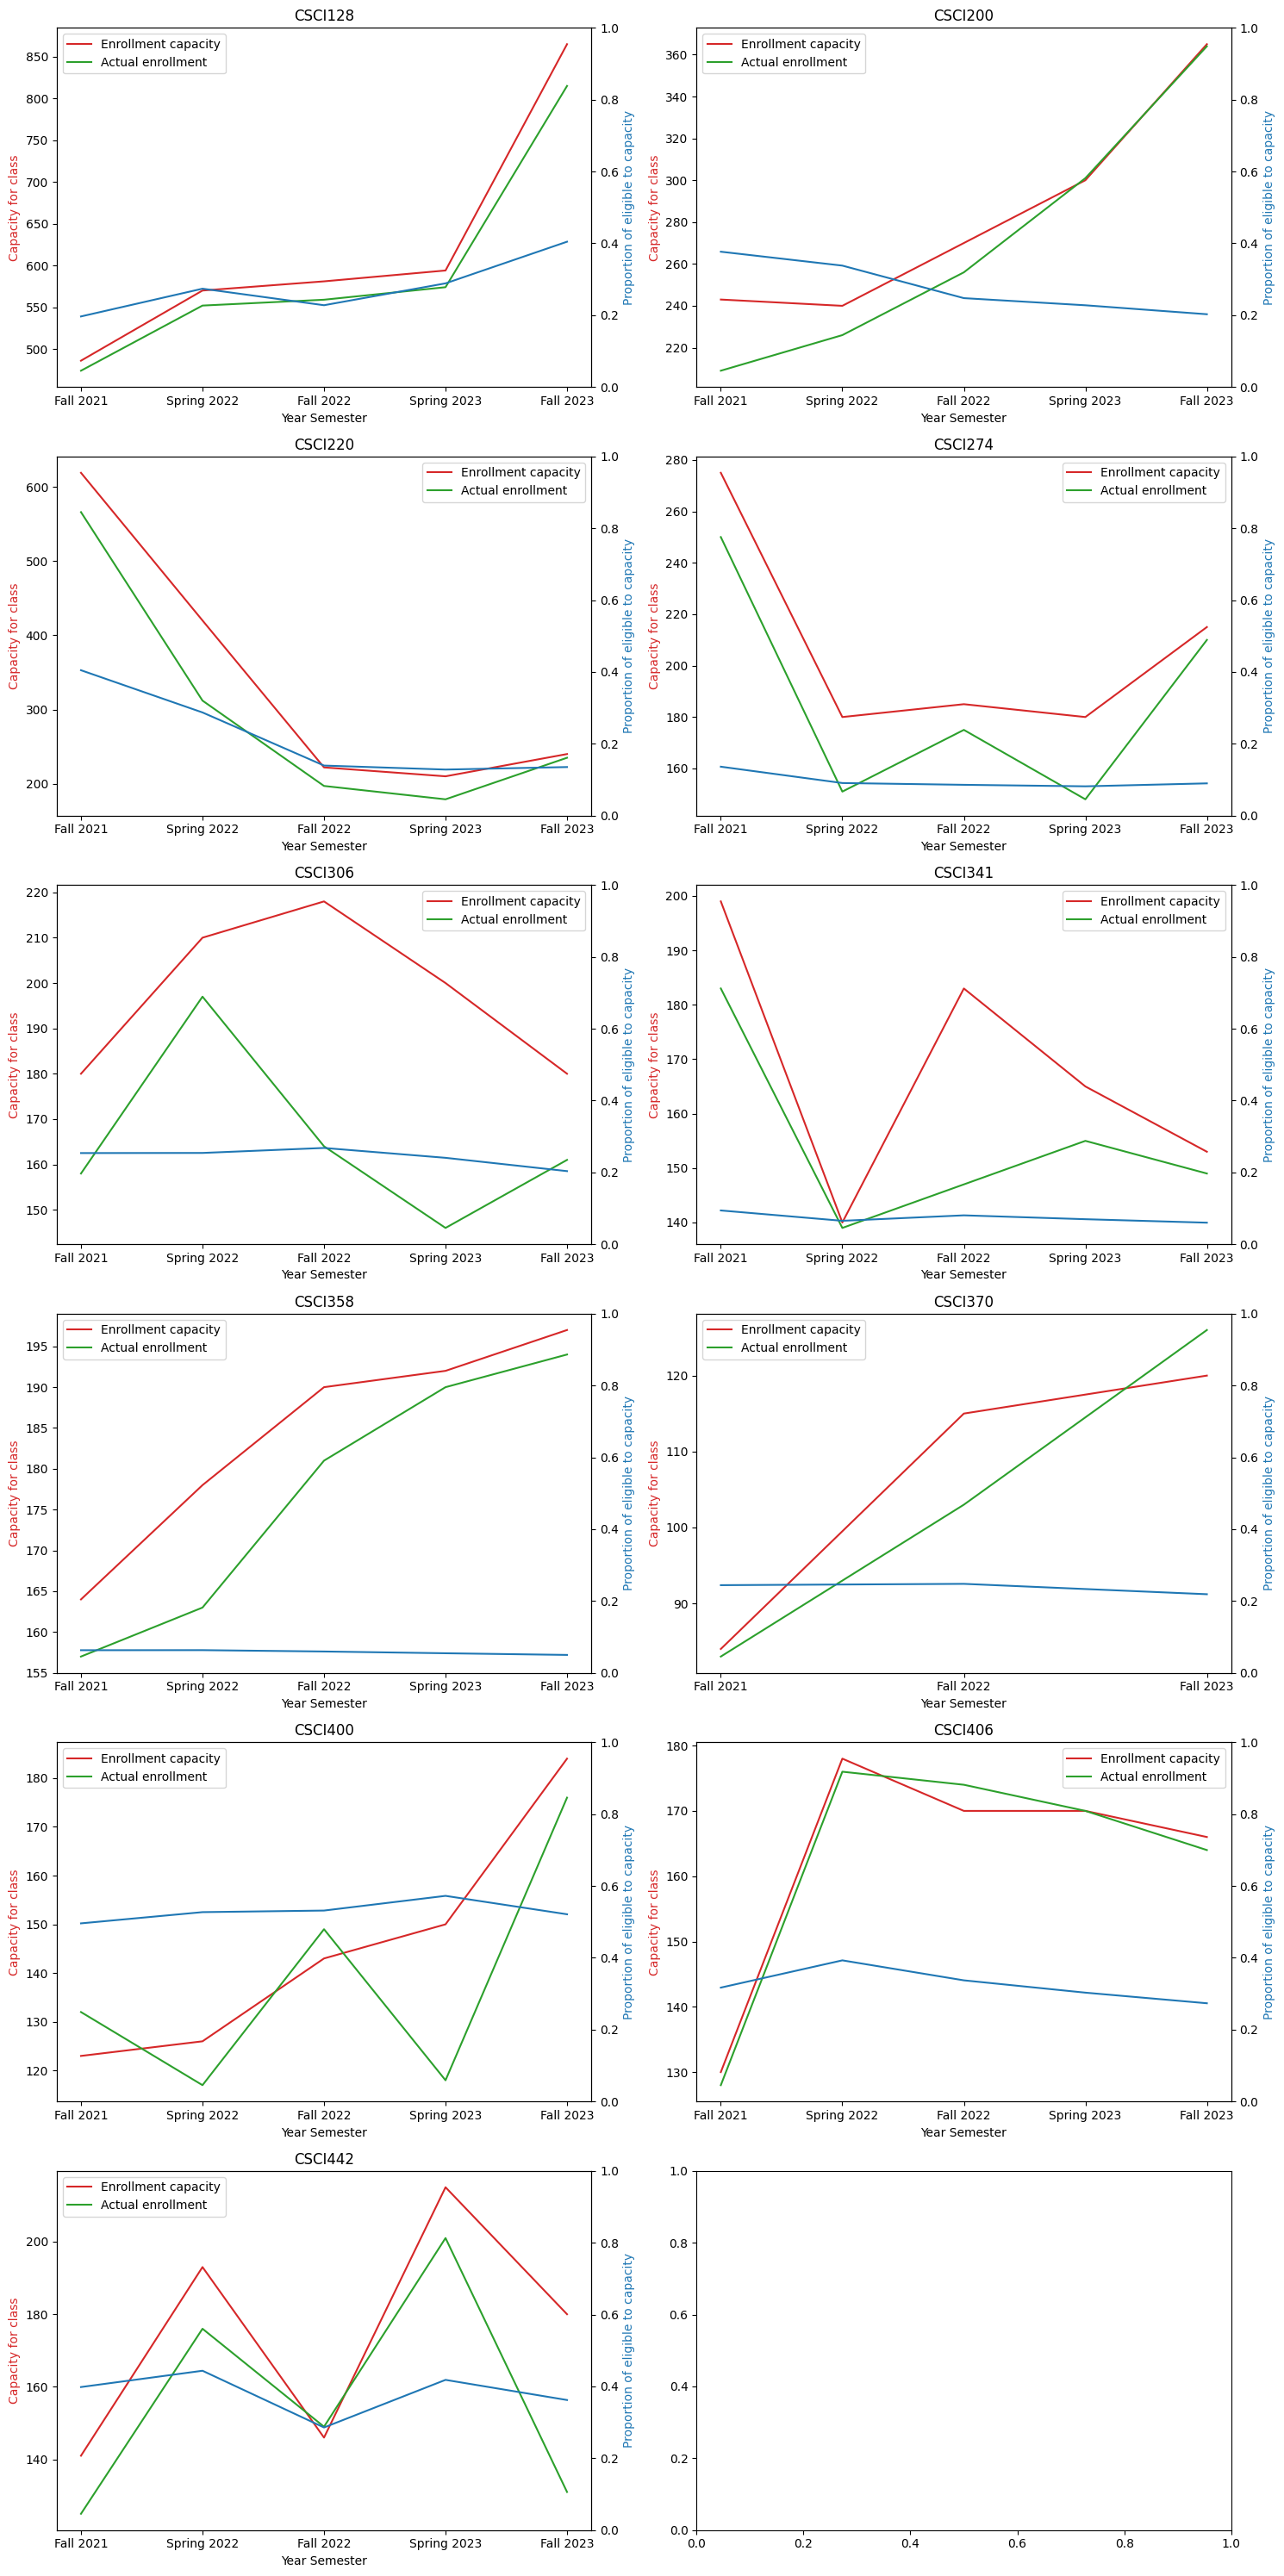

In [22]:
# ordered classes
ordered_classes = sorted(final_df['Class'].unique())

# Calculate the number of rows and columns for the subplot grid
num_classes = len(final_df['Class'].unique())
num_rows = int(np.ceil(num_classes / 2))  # Adjust '2' to change the number of columns

# Create a figure with subplots
fig, axs = plt.subplots(num_rows, 2, figsize=(15, 5 * num_rows))
axs = axs.flatten()  # Flatten the array for easy iteration

# Loop through each class and plot
for i, cl in enumerate(ordered_classes):
    temp_df = final_df[final_df['Class'] == cl]
    temp_df.loc[:, 'Act'] = temp_df['Act'].astype(int)
    temp_df.loc[:, 'Passed'] = temp_df['Passed'].astype(int)

    # Select the subplot
    ax1 = axs[i]
    color = 'tab:red'
    ax1.set_xlabel('Year Semester')
    ax1.set_ylabel('Capacity for class', color=color)
    ax1.plot(temp_df['Year_Semester'], temp_df['Cap'], color=color, label='Enrollment capacity')
    ax1.plot(temp_df['Year_Semester'], temp_df['Act'], color='tab:green', label='Actual enrollment')

    # add legend
    ax1.legend()

    # Create a secondary y-axis
    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('Proportion of capacity to eligible', color=color)
    ax2.set_ylim(0, 1)
    ax2.plot(temp_df['Year_Semester'], temp_df['Cap'] / temp_df['Eligible'], color=color, label='Capacity / eligible')

    # Set title for each subplot
    ax1.set_title(f'{cl}')

# Adjust layout
fig.tight_layout()

# Hide unused subplots if the number of classes is odd
if num_classes % 2 != 0:
    axs[-1]